## Demo: Probador de ropa virtual


### SETUP:

In [ ]:
!pip install google-generativeai Pillow gradio requests

In [ ]:
!pip install --upgrade gradio

In [ ]:
from google import genai
from google.genai import types
from PIL import Image # Pillow (PIL Fork) library: Handle image data
from io import BytesIO # work with in-memory binary streams as if they were regular file objects
from google.colab import userdata # Securely manage API keys
import gradio as gr # Create a user-friendly web interface


try:
    client = genai.Client(api_key=userdata.get('GOOGLE_API_KEY'))
except Exception as e:
    raise Exception(f"Failed to initialize Gemini client. Ensure your GOOGLE_API_KEY is correctly set. Error: {e}")

In [ ]:
def resize_image(image):
    width, height = image.size
    new_width = width // 2
    new_height = height // 2
    return image.resize((new_width, new_height))

def text_to_image(prompt):
    response = client.models.generate_content(
        model="gemini-2.0-flash-exp-image-generation",
        contents=prompt,
        config=types.GenerateContentConfig(
          response_modalities=['Text', 'Image']
        )
    )
    image = None
    for part in response.candidates[0].content.parts:
      if part.inline_data is not None:
        image = Image.open(BytesIO((part.inline_data.data)))
        if image is not None:
          image = resize_image(image)
    return image


def image_to_image(image, prompt, apply_resize=True):
    response = client.models.generate_content(
        model="gemini-2.0-flash-exp-image-generation",
        contents=[image, prompt],
        config=types.GenerateContentConfig(
          response_modalities=['Text', 'Image']
        )
    )
    image = None
    for part in response.candidates[0].content.parts:
      if part.inline_data is not None:
        image = Image.open(BytesIO((part.inline_data.data)))
        if image is not None and apply_resize:
          image = resize_image(image)
    return image


def generate_image_from_two_images(prompt, image_garment, image_person):
    if image_garment is None or image_person is None:
        return None
    try:
        response = client.models.generate_content(
            model="gemini-2.0-flash-exp-image-generation",
            contents=[prompt, image_garment, image_person],
            config=types.GenerateContentConfig(
              response_modalities=['Text', 'Image']
            )
        )
        image = None
        for part in response.candidates[0].content.parts:
          if part.inline_data is not None:
            image = Image.open(BytesIO((part.inline_data.data)))
            if image is not None:
              image = resize_image(image)
        return image
    except Exception as e:
        return f"Error generating image: {e}"

def dress_up_person(garment_image, person_image):
    prompt = "The person is wearing the garment realistically."
    return generate_image_from_two_images(prompt, garment_image, person_image)

# EXAMPLES
example_garment1 = "/content/drive/MyDrive/DL/VirtualTryOn/example_garment1.jpg"
example_garment2 = "/content/drive/MyDrive/DL/VirtualTryOn/example_garment2.jpg"
example_garment3 = "/content/drive/MyDrive/DL/VirtualTryOn/example_garment3.jpg"
example_garment4 = "/content/drive/MyDrive/DL/VirtualTryOn/example_garment4.jpg"
example_person1 = "/content/drive/MyDrive/DL/VirtualTryOn/example_person1.jpg"
example_person2 = "/content/drive/MyDrive/DL/VirtualTryOn/example_person2.jpg"
example_person3 = "/content/drive/MyDrive/DL/VirtualTryOn/example_person3.jpg"
example_person4 = "/content/drive/MyDrive/DL/VirtualTryOn/example_person4.jpg"


"""
# Original Example Images (URLs)
example_garment1 = "https://image.uniqlo.com/UQ/ST3/WesternCommon/imagesgoods/477795/sub/goods_477795_sub14_3x4.jpg?width=400"
example_garment2 = "https://image.uniqlo.com/UQ/ST3/WesternCommon/imagesgoods/477218/sub/goods_477218_sub14_3x4.jpg?width=400 "
example_garment3 = "https://image.uniqlo.com/UQ/ST3/WesternCommon/imagesgoods/463182/sub/goods_463182_sub14_3x4.jpg?width=400"
example_garment4 = "https://image.uniqlo.com/UQ/ST3/WesternCommon/imagesgoods/474056/sub/goods_474056_sub14_3x4.jpg?width=400"
example_person1 = "https://www.pexels.com/photo/fashionable-duo-in-stylish-pleated-outfits-31422876/"
example_person2 = "https://www.pexels.com/photo/woman-wearing-white-and-blue-floral-dress-carrying-brown-handbag-3195980/"
example_person3 = "https://www.pexels.com/photo/man-standing-on-seashore-2907034/"
example_person4 = "https://www.pexels.com/photo/photo-of-woman-wearing-red-dress-1644898/"
"""

'\n# Original Example Images (URLs)\nexample_garment1 = "https://image.uniqlo.com/UQ/ST3/WesternCommon/imagesgoods/477795/sub/goods_477795_sub14_3x4.jpg?width=400"\nexample_garment2 = "https://image.uniqlo.com/UQ/ST3/WesternCommon/imagesgoods/477218/sub/goods_477218_sub14_3x4.jpg?width=400 "\nexample_garment3 = "https://image.uniqlo.com/UQ/ST3/WesternCommon/imagesgoods/463182/sub/goods_463182_sub14_3x4.jpg?width=400"\nexample_garment4 = "https://image.uniqlo.com/UQ/ST3/WesternCommon/imagesgoods/474056/sub/goods_474056_sub14_3x4.jpg?width=400"\nexample_person1 = "https://www.pexels.com/photo/fashionable-duo-in-stylish-pleated-outfits-31422876/"\nexample_person2 = "https://www.pexels.com/photo/woman-wearing-white-and-blue-floral-dress-carrying-brown-handbag-3195980/"\nexample_person3 = "https://www.pexels.com/photo/man-standing-on-seashore-2907034/"\nexample_person4 = "https://www.pexels.com/photo/photo-of-woman-wearing-red-dress-1644898/"\n'

In [ ]:
# Create a Gradio interface
demo = gr.Interface(
    fn=dress_up_person,
    inputs=[
        gr.Image(type="pil", label="Imagen de la prenda"),
        gr.Image(type="pil", label="Imagen de la persona")
    ],
    outputs=gr.Image(type="pil", label="Imagen final"),
    title="Probador de Ropa Virtual",
    description="Sube una imagen de una prenda y una imagen de una persona o de ti para generar una imagen donde la persona usa la prenda de forma realista.",
    examples=[
        [example_garment1, example_person1],
        [example_garment2, example_person2],
        [example_garment3, example_person3],
        [example_garment4, example_person4]
    ]
)

# Launch the demo
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a8af3f6a107bf71030.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


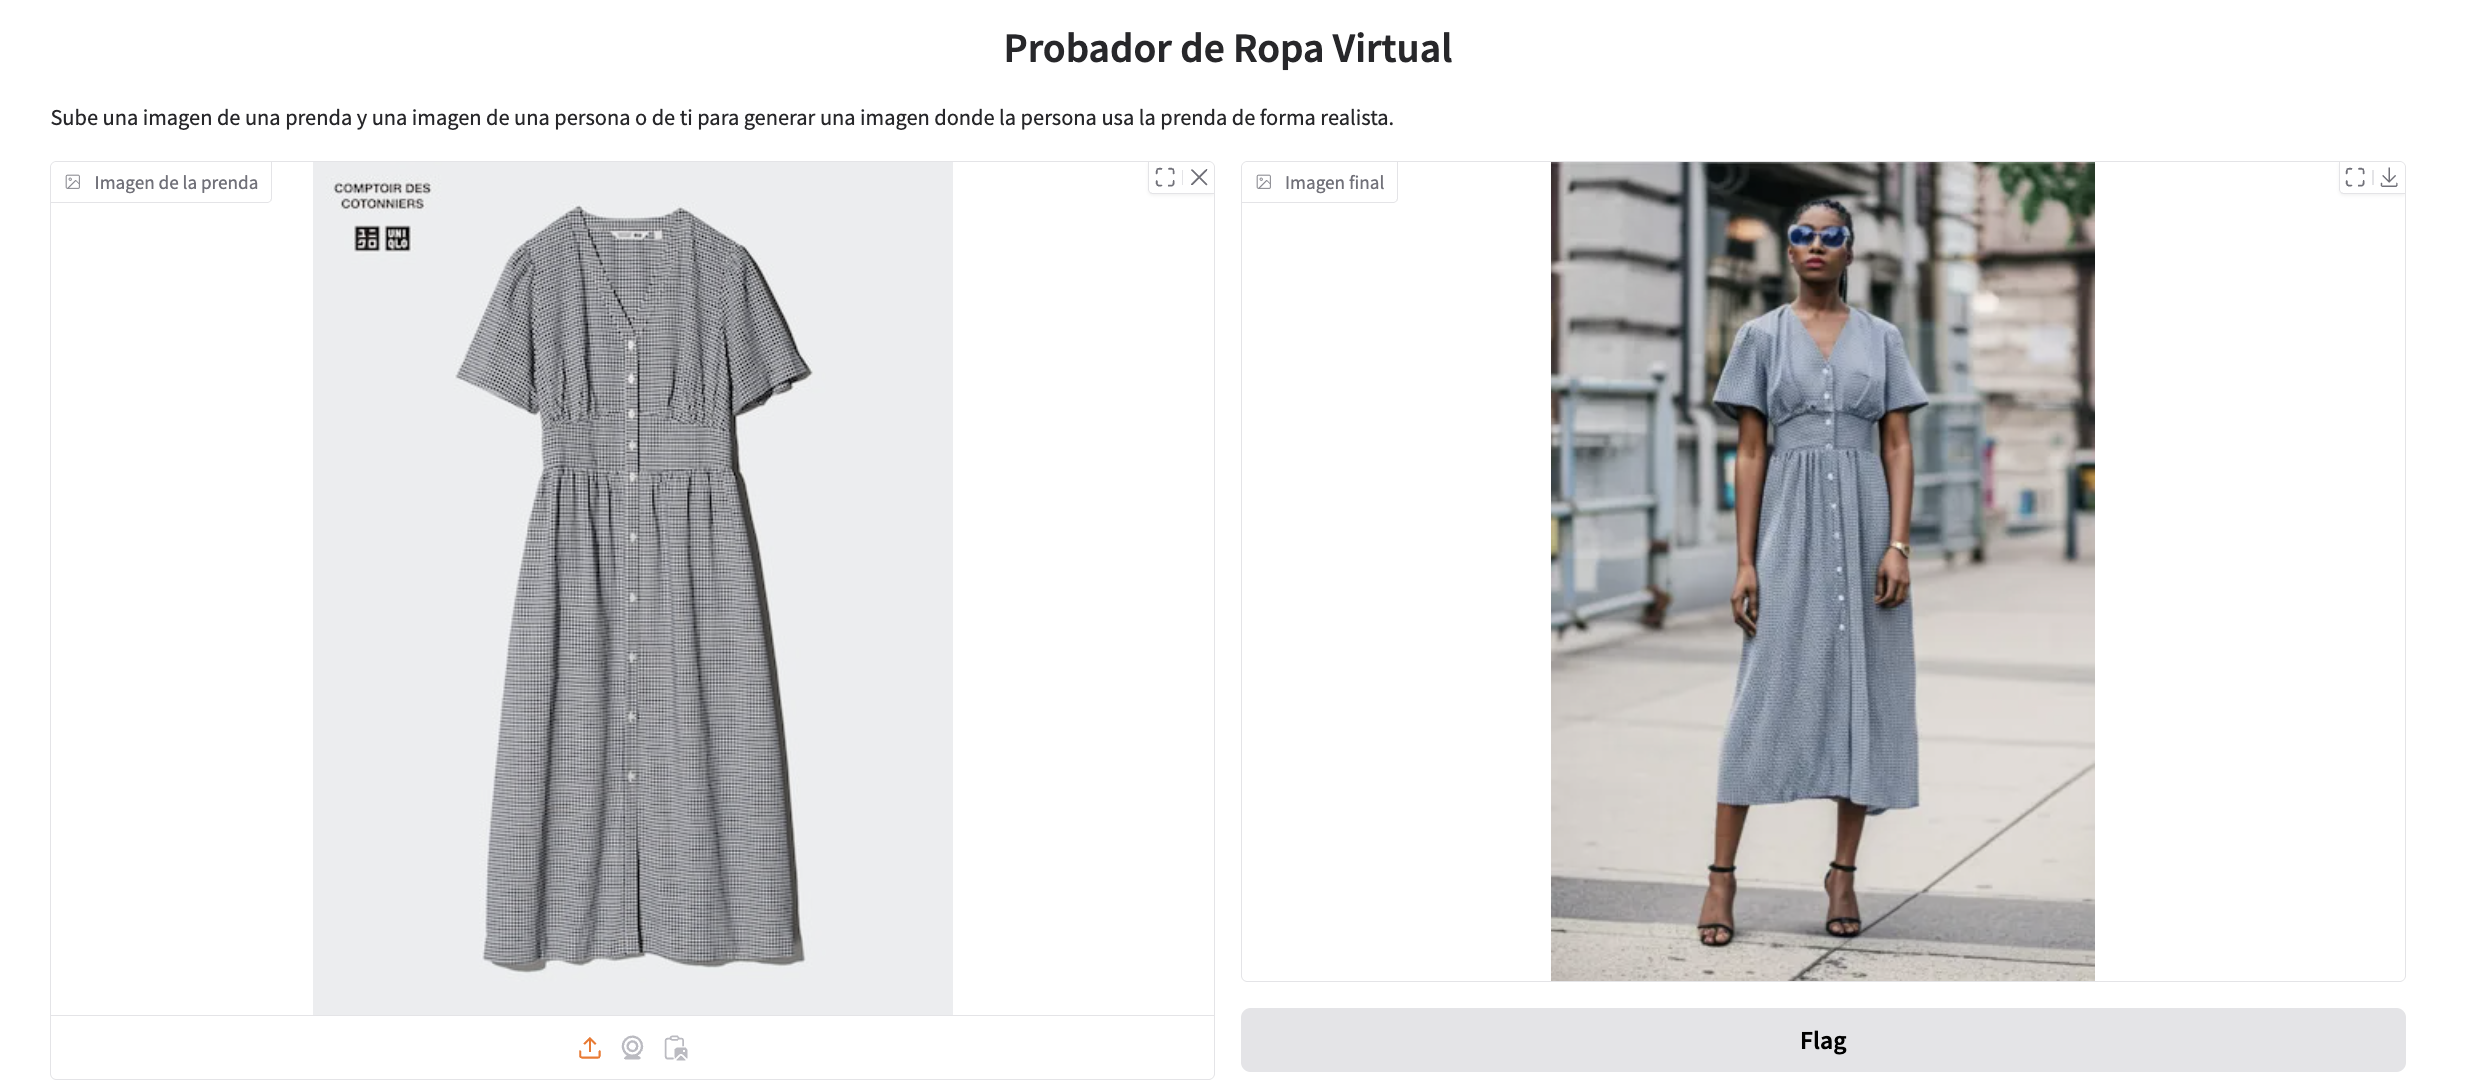

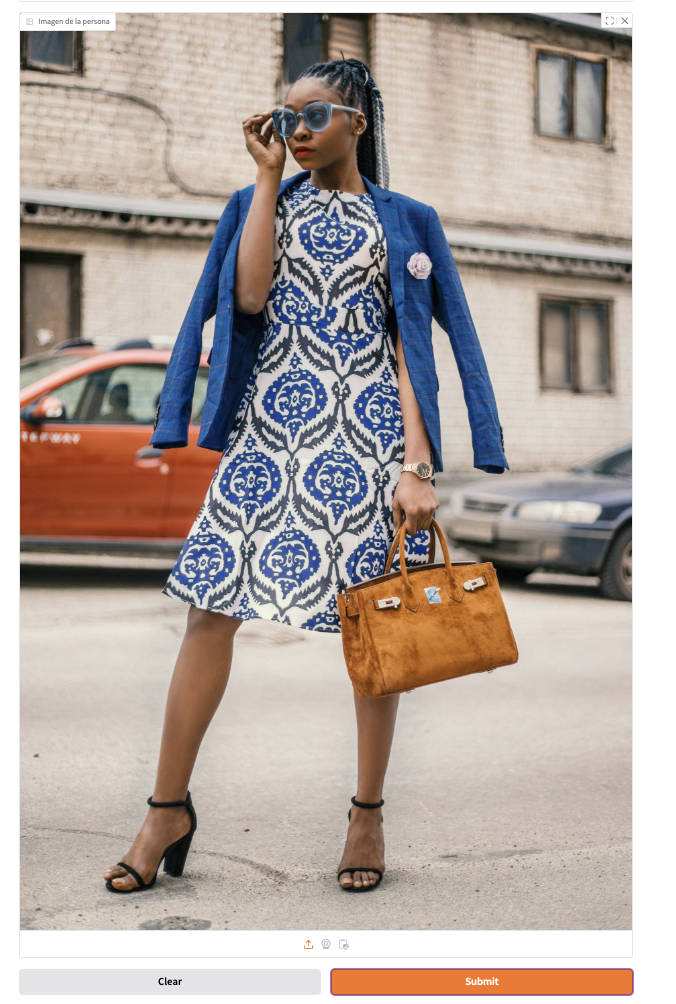

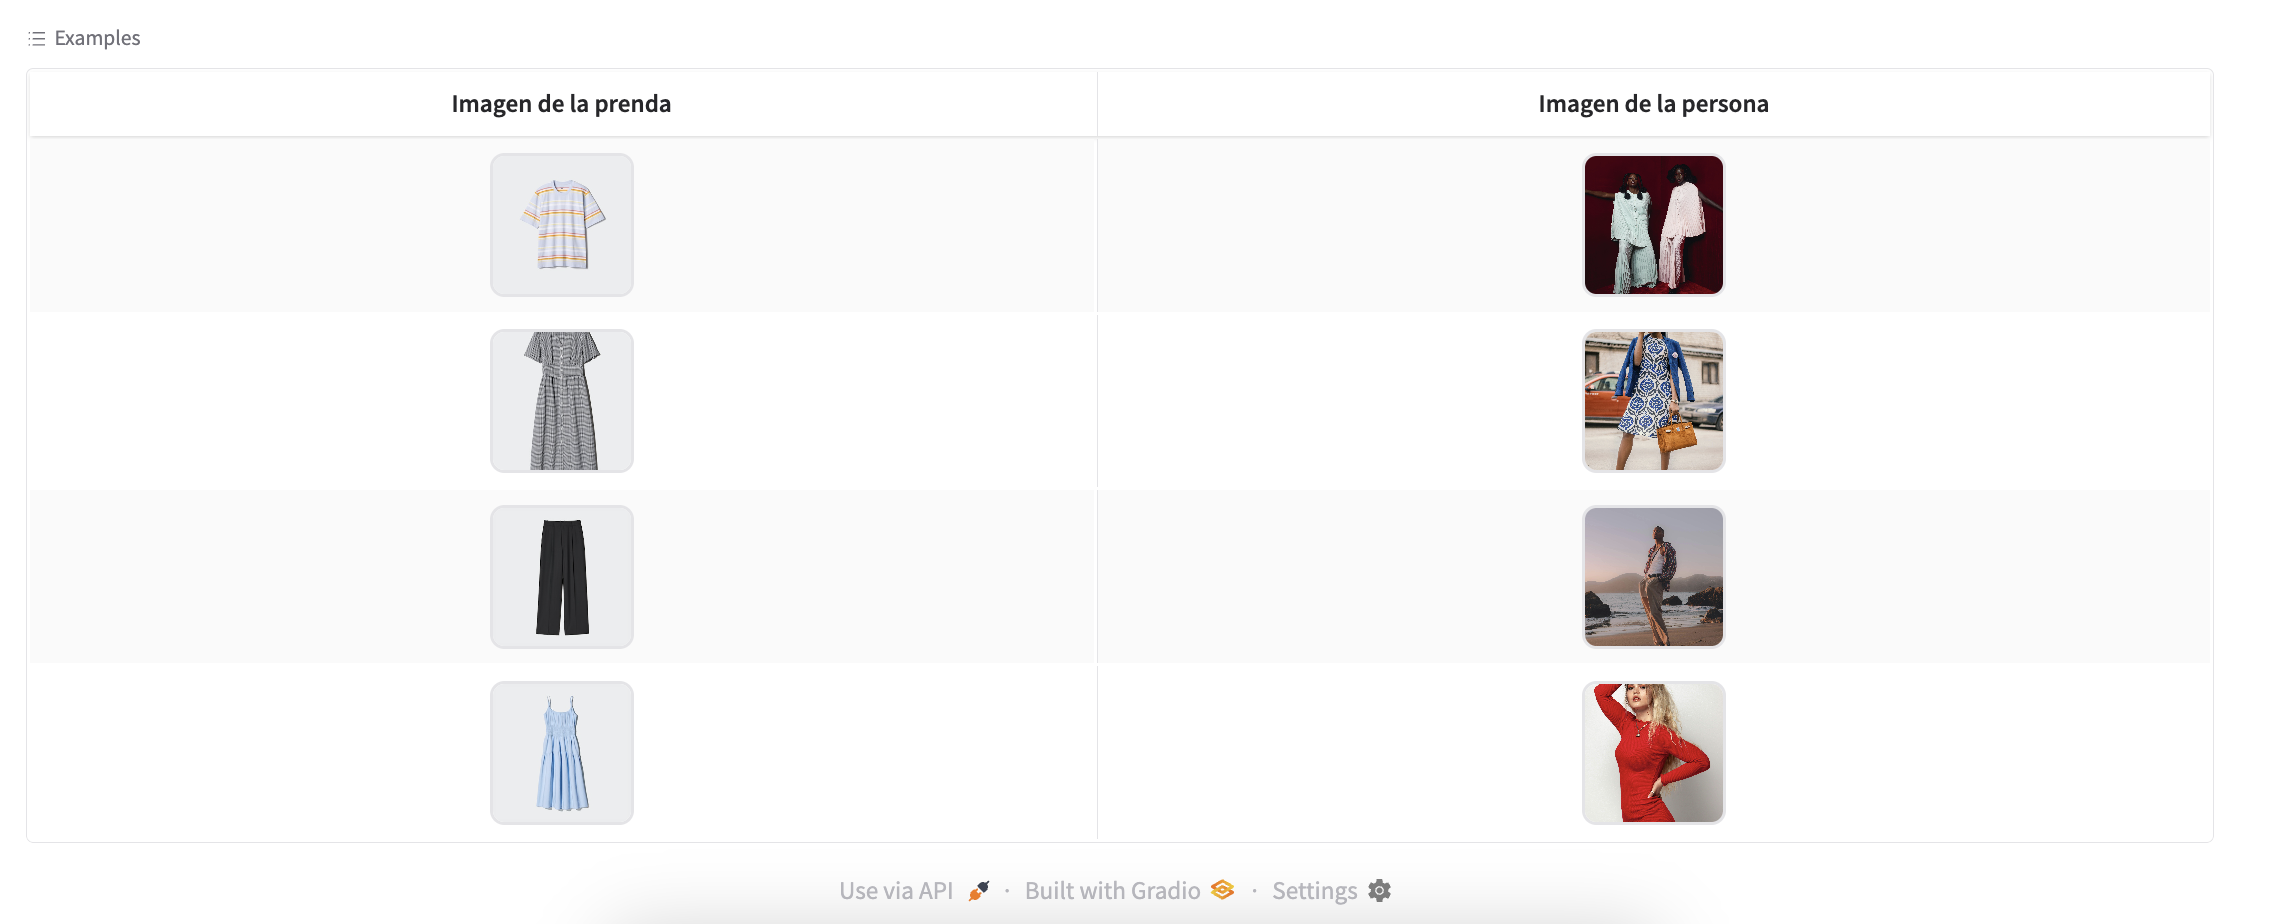

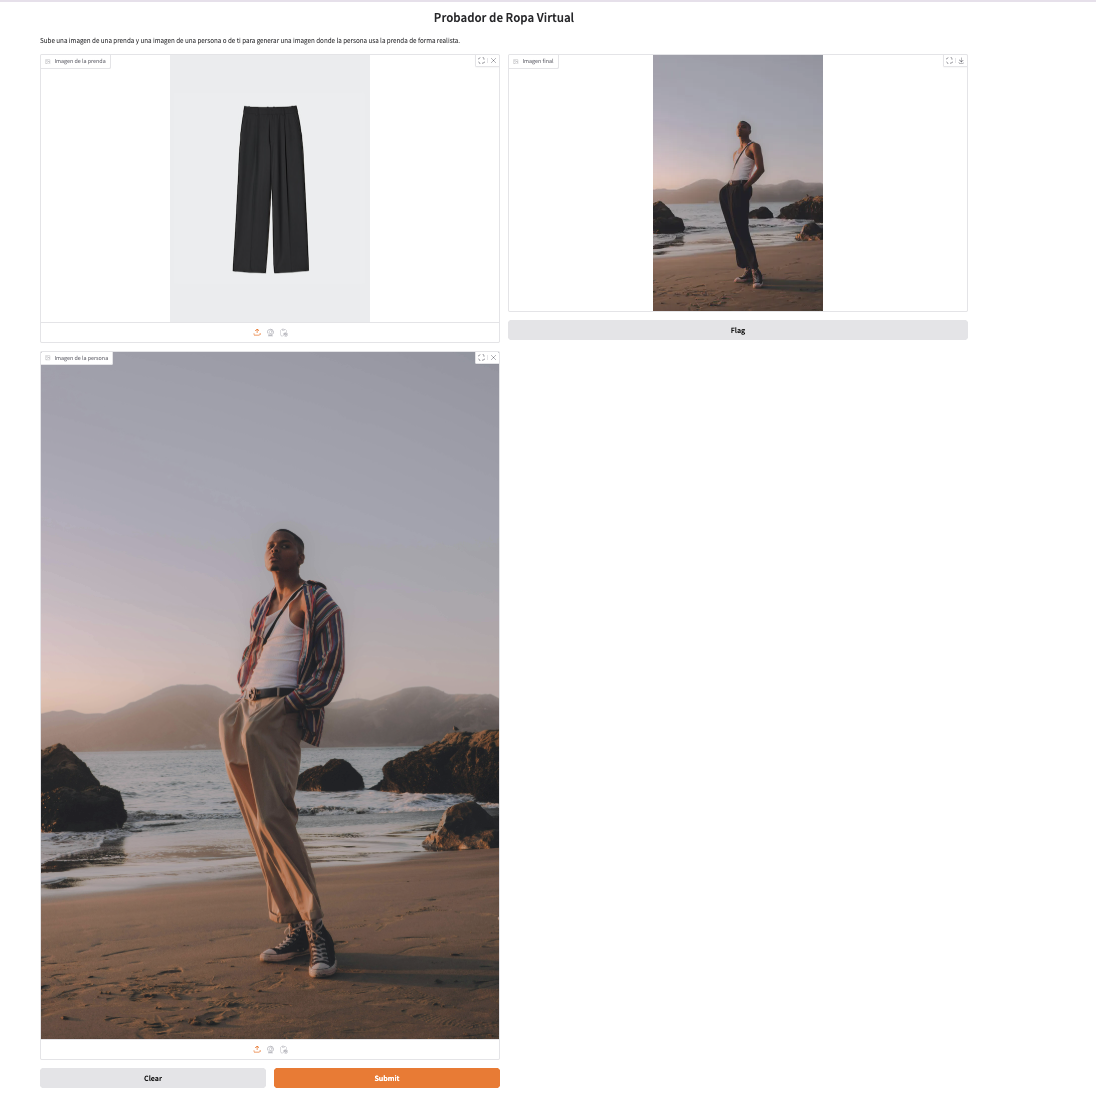

Dress: [Valetta Two-Piece Dress](https://https://www.nordstrom.com/s/valetta-two-piece-dress/8210792?origin=category-personalizedsort&breadcrumb=Home%2FWomen%2FClothing%2FMatching%20Sets&color=001) (Reformation)

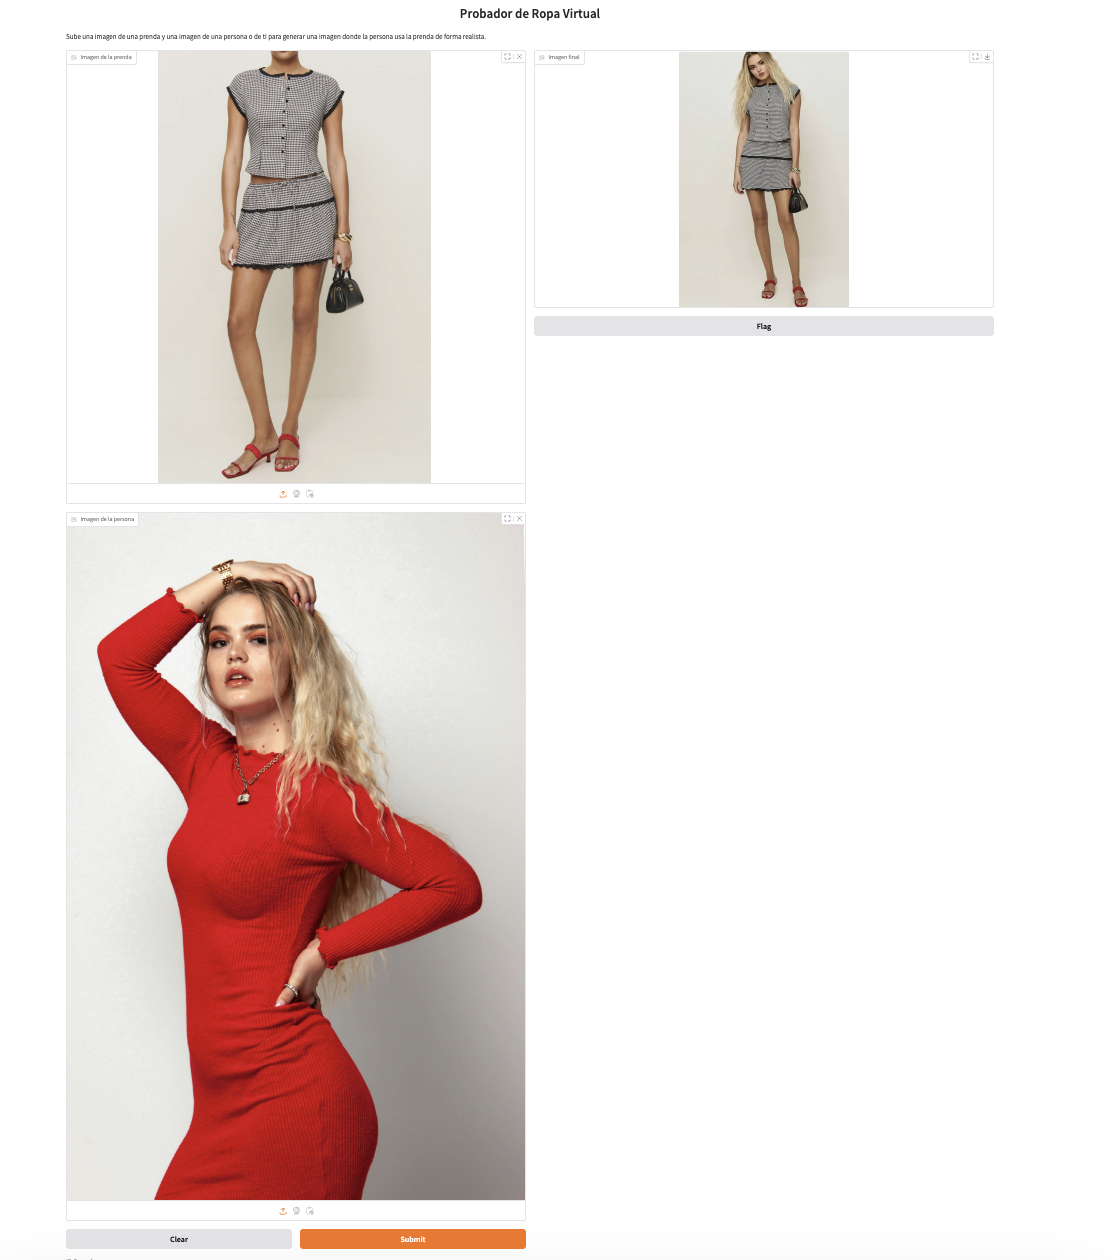